In [87]:
#importamos librerías

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [88]:
# IMPORTACIÓN DEL DATASET REDUCIDO LUEGO DEL PROCESAMIENTO DE COLUMNAS

df = pd.read_csv('friesgo_2018_reduc.csv',  sep=',', encoding='utf-8')

In [89]:
#muevo columnas de variables dependiendtes (enfermedades) al final

columnas_alFinal = [ 'dijeron_diabetes','veces_presion_alta', 'colesterol_alto']

df = df[[col for col in df if col not in columnas_alFinal] + columnas_alFinal]

#print (df.iloc[:,-3:]) 

In [90]:
#conjunto de datos sin las 3 columnas target y sin ID

X1 = df.iloc[:, 1:-3]  # Todas las columnas menos las últimas tres y la primera (id)

In [91]:
# Estandariza los datos
#scaler = StandardScaler()
#X = scaler.fit_transform(X1)

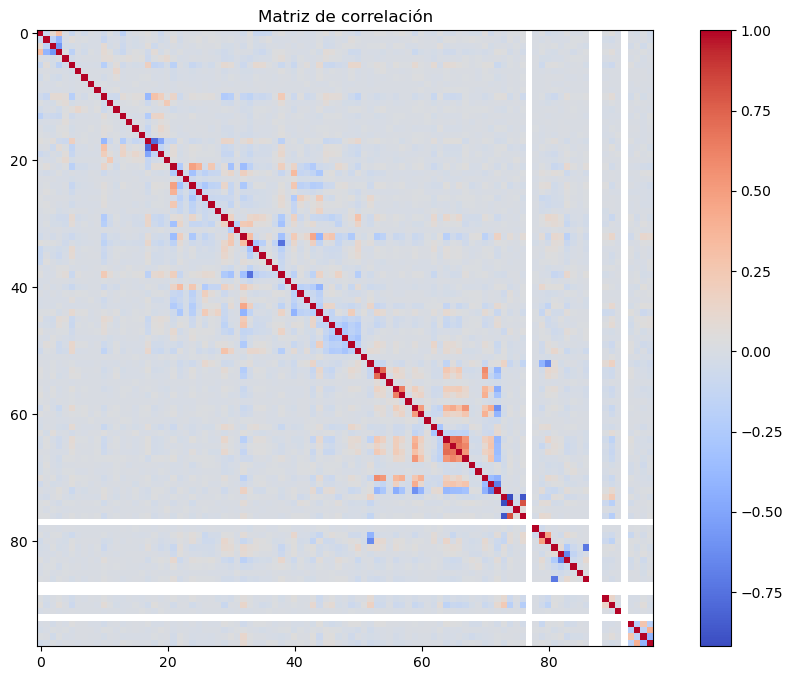

In [92]:

# 1.2 Análisis de correlación (opcional)
matriz_correlacion = pd.DataFrame(X1).corr()
plt.figure(figsize=(12, 8))
plt.imshow(matriz_correlacion, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Matriz de correlación")
plt.show()

In [93]:

# Identificar pares de variables con alta correlación
threshold = 0.75  # Establecer un umbral para lo que consideras "alta" correlación
high_corr = np.where(np.abs(matriz_correlacion) > threshold)
high_corr_pairs = [(matriz_correlacion.index[x], matriz_correlacion.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]

    

In [94]:

# Mostrar pares de variables altamente correlacionadas
for pair in high_corr_pairs:
    print(f"Variables altamente correlacionadas: {pair[0]} y {pair[1]} con coeficiente {matriz_correlacion.loc[pair[0], pair[1]]:.2f}")
    

Variables altamente correlacionadas: baño_1 y baño_2 con coeficiente -0.77
Variables altamente correlacionadas: alguna_vez_fumo y edad_fumo_primera_vez con coeficiente -0.92
Variables altamente correlacionadas: alguna_vez_fumo y actualmente_fuma_cigarrillos con coeficiente -0.87
Variables altamente correlacionadas: edad_fumo_primera_vez y actualmente_fuma_cigarrillos con coeficiente 0.81


In [95]:
# Lista de columnas a eliminar
#columns_to_drop = [18, 74, 76]
columns_to_drop = ['baño_2', 'edad_fumo_primera_vez', 'actualmente_fuma_cigarrillos']
#X_reduced= X1.drop(columns=columns_to_drop)
X_reduced= X1.drop(columns=columns_to_drop)


In [ ]:
# Escalamos el dataset antes de correr PCA y aplicar DBscan
scaler = StandardScaler()
X= scaler.fit_transform(X_reduced)

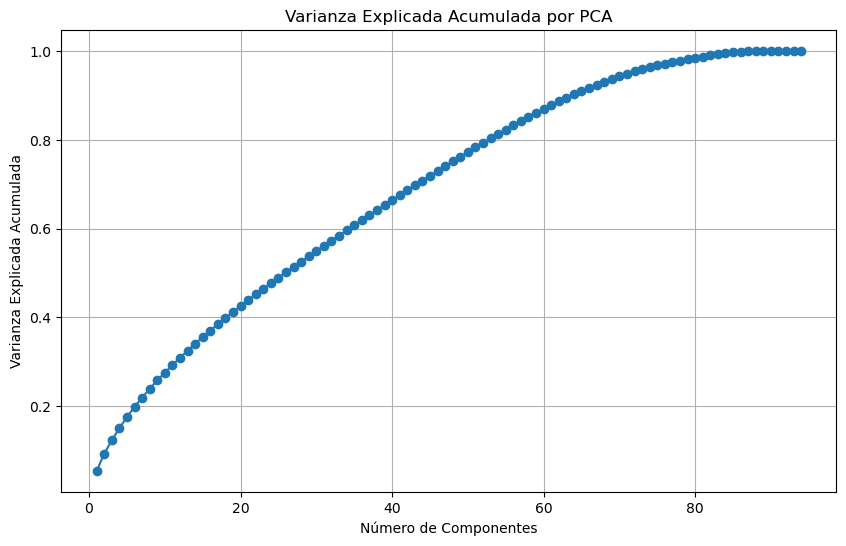

Para alcanzar al menos el 80% de la varianza explicada, se necesitan 53 componentes.


In [96]:
# Inicializar PCA
pca = PCA()

# Ajustar PCA a los datos estandarizados
X_pca = pca.fit_transform(X)


# Verificar la varianza explicada acumulada
varianza_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)


# Graficar la varianza explicada acumulada para decidir el número de componentes
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada, marker='o')
plt.title('Varianza Explicada Acumulada por PCA')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

# Imprimir la varianza explicada acumulada con un límite de 80% o más
componentes_para_80 = np.argmax(varianza_explicada_acumulada >= 0.80) + 1
print(f"Para alcanzar al menos el 80% de la varianza explicada, se necesitan {componentes_para_80} componentes.")

In [97]:
# Reduccion de dimensionalidad

pca = PCA(n_components=53)  # Selecciona el número de componentes principales

#pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

In [98]:

# Se añade la información de los componentes principales al DataFrame original
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 
                                      'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 
                                      'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 
                                      'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 
                                      'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 
                                      'PC50', 'PC51', 'PC52', 'PC53'])


#pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

df_merged = pd.merge(df, pca_df, right_index=True, left_index=True)

In [99]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,3.791984,1.259326,3.233612,1.304991,0.542111,1.060960,-1.158338,1.851104,0.661483,0.028878,...,0.664431,0.660920,-0.213036,-0.169277,-0.218098,0.974447,-1.227461,0.493691,-0.824162,-1.589255
1,2.078735,2.861135,1.810582,0.288320,1.298964,-2.723036,1.000603,2.928428,-0.109842,-1.058346,...,0.094269,0.672521,0.273242,0.517738,-0.422566,-0.594425,-0.837894,-0.209230,-0.353141,-0.232042
2,1.616906,2.272978,-0.084472,1.916647,-2.191713,-1.266437,-0.365781,1.948011,1.105737,-1.691366,...,1.100347,-0.280159,0.227528,-1.173792,0.482163,1.576135,-0.245778,-0.817530,0.390976,0.042876
3,-2.916096,2.634176,1.169269,3.029327,-1.534479,-0.084015,0.953079,0.804938,1.637347,0.308458,...,-0.771779,-0.242618,1.271268,-1.153066,-0.442461,2.083281,-0.253486,3.525003,1.845850,-1.856606
4,1.891127,0.644585,0.430715,1.403830,-3.301505,2.298400,0.646787,1.881150,-0.048833,-0.860330,...,0.685573,-0.809850,0.249643,-0.547050,1.301372,1.569253,-0.527969,0.843003,-0.900428,0.383957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25632,0.441591,-1.671550,-2.392133,1.996615,0.267504,-0.288749,0.171766,0.337764,-1.722987,-2.091537,...,0.589213,0.955504,-1.395323,1.233246,0.962930,1.333107,-0.965005,-1.292366,0.077546,-2.840745
25633,-1.254370,0.886368,1.820738,-2.365928,0.078140,-0.099343,-1.516843,-1.057690,-0.394828,-0.274053,...,-0.455622,0.213874,0.863727,-0.245989,-0.022468,0.178769,-0.287844,0.119363,-0.608860,0.216619
25634,1.150232,1.403417,-1.766038,0.504226,2.181483,0.313143,0.419227,-3.252778,0.856930,-0.660766,...,0.463641,-0.364986,-0.489446,0.625558,0.954320,-0.290691,0.892955,0.603956,-2.065963,0.631821
25635,1.677603,0.148419,-1.553722,-1.339223,0.035018,-1.863020,1.257040,-2.701050,-0.928771,-1.431761,...,-0.378813,-0.117038,0.321549,-0.121244,0.366925,-0.231664,0.763305,0.190313,-0.159136,0.661094


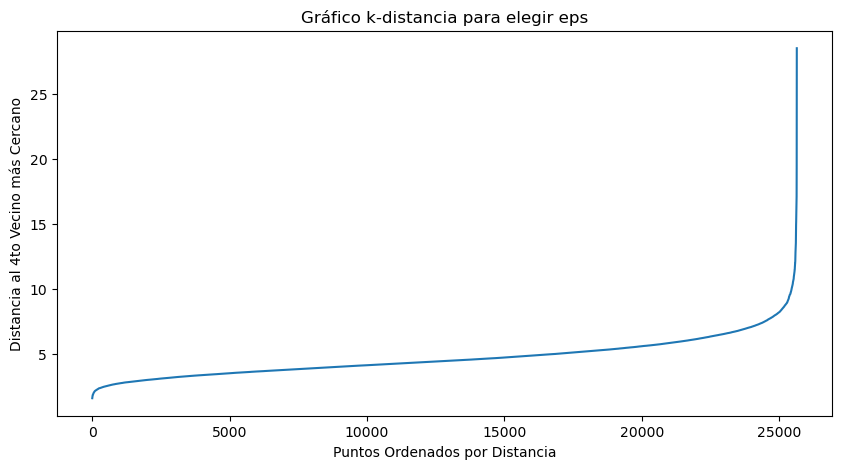

In [100]:
# 3.1 Ajuste de eps utilizando gráfico k-distancia
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_pca)
distances, indices = nbrs.kneighbors(X_pca)
distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.xlabel('Puntos Ordenados por Distancia')
plt.ylabel('Distancia al 4to Vecino más Cercano')
plt.title('Gráfico k-distancia para elegir eps')
plt.show()


In [120]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=5, min_samples=100).fit(pca_df)  # Ajusta 'eps' y 'min_samples' según sea necesario

# con 50 y 300 me dio 2 clusters y 112 ruidosso
labels = dbscan.fit_predict(pca_df)

labels = dbscan.labels_  # Etiquetas asignadas a cada punto
no_clusters = len(np.unique(labels))  # Número de clusters encontrados (excluyendo ruido)
no_noise = np.sum(np.array(labels) == -1)  # Número de puntos clasificados como ruido (outliers)
print('# Clusters estimados: %d' % no_clusters)  # Muestra el número de clusters estimado
print('# Puntos ruidosos: %d' % no_noise)  # Muestra el número de ruido

# Clusters estimados: 2
# Puntos ruidosos: 14476


In [121]:
# Agregar los labels (clusters) generados al DataFrame original
df['Cluster'] = labels

In [122]:
# Crear un DataFrame con la distribución de regiones en cada cluster
cluster_region_distribution = pd.crosstab(df['Cluster'], df['region'])

In [123]:
region_dict = {
    1: 'Metropolitana',
    2: 'Pampeana',
    3: 'Noroeste',
    4: 'Noreste',
    5: 'Cuyo',
    6: 'Patagónica'
}



In [124]:
# Renombrar las regiones usando el diccionario
cluster_region_distribution = cluster_region_distribution.rename(columns=region_dict)


In [125]:
print(cluster_region_distribution)


region   Metropolitana  Pampeana  Noroeste  Noreste  Cuyo  Patagónica
Cluster                                                              
-1                2165      4519      2719     2053  1341        1679
 0                1072      3765      1938     1466  1012        1908


## Se observan solamente 2 clusters. Están bien divididos pero las regiones no parecen ser importantes en esta clasificación